## Read data from pkl file

In [11]:
import pickle
import os

data = pickle.load(open('./data/test_final.pkl', 'rb'))
path_to_bev_lidar = './data/test_final'

## Select a random time index from pkl file

In [12]:
import random

r_idx = random.randint(0, len(os.listdir(path_to_bev_lidar)))
print(f'indices 0 to {len(os.listdir(path_to_bev_lidar)) - 1}')
print('selected time_index: ', r_idx)

indices 0 to 1307
selected time_index:  742


In [13]:
future_joystick = data['future_joystick']
odom = data['odom']

## Get one sample of data

In [14]:
from PIL import Image
import numpy as np

joystick_sample = future_joystick[r_idx]
lidar_sample = np.asarray(Image.open(os.path.join(path_to_bev_lidar, f'{r_idx}.png')))
data_sample = (joystick_sample, lidar_sample)

### Joystick Sample

In [15]:
import pandas as pd

joystick_sample_df = pd.DataFrame(data=joystick_sample, columns=['linear_x', 'linear_y', 'angular_z'])
print('time_index', r_idx)
joystick_sample_df

time_index 742


,linear_x,linear_y,angular_z
0,1.6,-0.109302,-0.000000
1,1.6,-0.109302,-0.000000
2,1.6,-0.109302,-0.000000
3,1.6,-0.109302,-0.000000
4,1.6,-0.109302,-0.000000
...,...,...,...
295,1.6,0.000000,0.024928
296,1.6,0.000000,0.024928
297,1.6,0.000000,0.062176
298,1.6,0.000000,0.124256


### BEV Lidar Image Stack Sample

In [16]:
from bev_lidar_stack_helper import get_bev_lidar_img_stack

bev_lidar_img_stack, img_file_names = get_bev_lidar_img_stack(odom=odom, path_to_bev_lidar=path_to_bev_lidar, t_idx=r_idx, verbose=True)
bev_lidar_img_stack.shape

20


(5, 401, 401)

time_index:  742


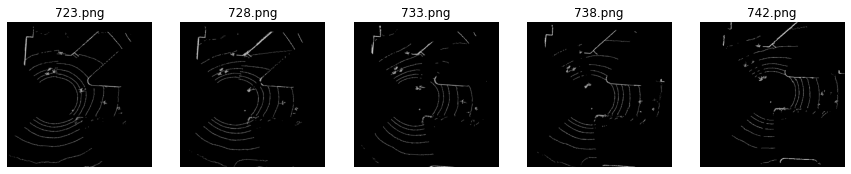

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 7), num=r_idx)
rows = 1
columns = 5

print('time_index: ', r_idx)

fig.add_subplot(rows, columns, 1)
plt.imshow(bev_lidar_img_stack[0], cmap='gray')
plt.axis('off')
plt.title(img_file_names[0])

fig.add_subplot(rows, columns, 2)
plt.imshow(bev_lidar_img_stack[1], cmap='gray')
plt.axis('off')
plt.title(img_file_names[1])

fig.add_subplot(rows, columns, 3)
plt.imshow(bev_lidar_img_stack[2], cmap='gray')
plt.axis('off')
plt.title(img_file_names[2])

fig.add_subplot(rows, columns, 4)
plt.imshow(bev_lidar_img_stack[3], cmap='gray')
plt.axis('off')
plt.title(img_file_names[3])

fig.add_subplot(rows, columns, 5)
plt.imshow(bev_lidar_img_stack[4], cmap='gray')
plt.axis('off')
plt.title(img_file_names[4]);
